**Downloading data**  

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download mrmorj/restaurant-recommendation-challenge

100% 532M/534M [00:06<00:00, 78.3MB/s]
100% 534M/534M [00:06<00:00, 86.5MB/s]


In [6]:
! cd /content
! ls

kaggle.json  restaurant-recommendation-challenge.zip  sample_data


In [7]:
!unzip  restaurant-recommendation-challenge.zip

Archive:  restaurant-recommendation-challenge.zip
  inflating: SampleSubmission (1).csv  
  inflating: VariableDefinitions.txt  
  inflating: orders.csv              
  inflating: test_customers.csv      
  inflating: test_full.csv           
  inflating: test_locations.csv      
  inflating: train_customers.csv     
  inflating: train_full.csv          
  inflating: train_locations.csv     
  inflating: vendors.csv             


In [8]:
!ls

 kaggle.json				   test_locations.csv
 orders.csv				   train_customers.csv
 restaurant-recommendation-challenge.zip   train_full.csv
 sample_data				   train_locations.csv
'SampleSubmission (1).csv'		   VariableDefinitions.txt
 test_customers.csv			   vendors.csv
 test_full.csv



# **Exploratory Data Analysis**

***Importing neccessary libraries***

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

***Read Data from csv file***

In [10]:
import pandas as pd
data = pd.read_csv("/content/train_full.csv")
#data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
data.head(5)

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [12]:
data.shape # check the number of columns and rows of data

(5802400, 73)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802400 entries, 0 to 5802399
Data columns (total 73 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   customer_id             object 
 1   gender                  object 
 2   status_x                int64  
 3   verified_x              int64  
 4   created_at_x            object 
 5   updated_at_x            object 
 6   location_number         int64  
 7   location_type           object 
 8   latitude_x              float64
 9   longitude_x             float64
 10  id                      int64  
 11  authentication_id       float64
 12  latitude_y              float64
 13  longitude_y             float64
 14  vendor_category_en      object 
 15  vendor_category_id      float64
 16  delivery_charge         float64
 17  serving_distance        float64
 18  is_open                 float64
 19  OpeningTime             object 
 20  OpeningTime2            object 
 21  prepration_time         int64  

In [14]:
data.head(5)

,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [15]:
data['vendor_tag_name'].isnull().sum()

174072

In [16]:
data['vendor_tag_name'] = data['vendor_tag_name'].replace(np.nan,'others')

In [17]:
len(data['customer_id'].unique())

34523

In [18]:
len(data['id_obj'].unique())

100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


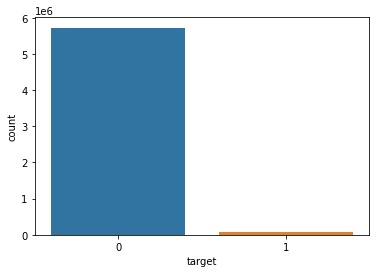

In [19]:
import seaborn as sns
sns.countplot('target',data=data)

From above graph we can see dataset is highly imbalanced 

**Univariate** **Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


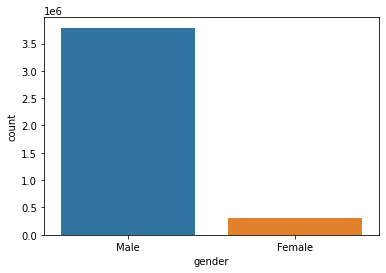

In [20]:
import seaborn as sns
sns.countplot('gender',data = data)

Male count is more than female count in the dataset

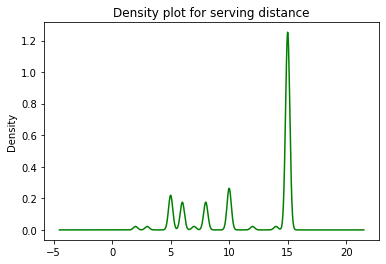

In [ ]:
# plotting density plot for serving distance column
import matplotlib.pyplot as plt
data.serving_distance.plot.density(color='green')
plt.title('Density plot for serving distance')
plt.show()

From above density plot serving distance is between 5 to 15 kms.15 kms has the highest density.

In [21]:
data['serving_distance'].isnull().sum() # checking for any nan values in 'serving_distance' feature

0

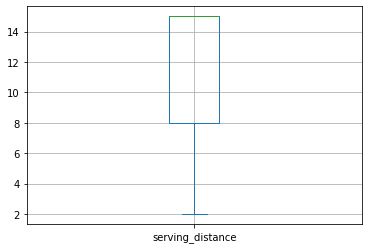

In [22]:
data['serving_distance'].plot.box(grid = True) #box plot for serving distance to check for any oultiers
#plt.ylim([0,25])

We can see there are no outliers as such in serving_distance feature

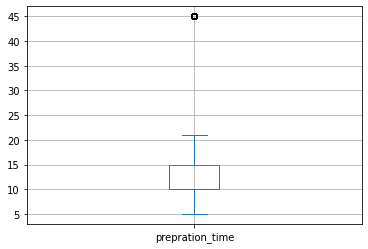

In [23]:
data['prepration_time'].plot.box(grid = True)

In [24]:
filtered_data = (data[data['prepration_time'] >= 45]).index

In [25]:
data.drop(filtered_data,inplace =True)
data.shape

(5744376, 73)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


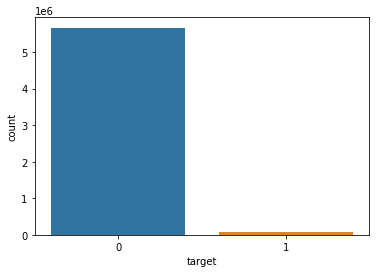

In [26]:
sns.countplot('target',data=data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


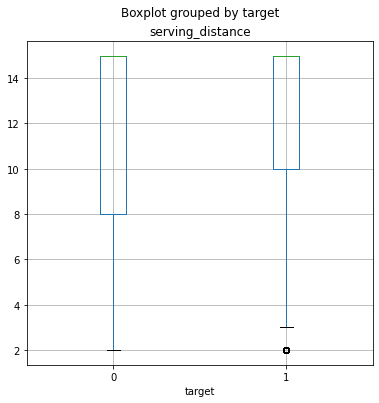

In [27]:
data.boxplot('serving_distance', by='target', figsize=(6, 6))

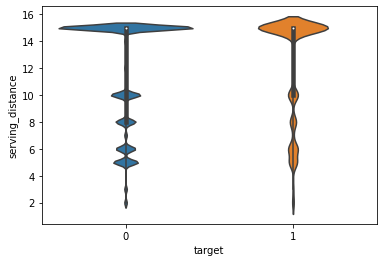

In [28]:
sns.violinplot(x="target", y="serving_distance", data=data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


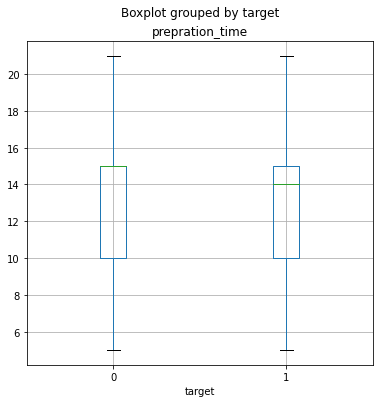

In [29]:
data.boxplot('prepration_time', by='target', figsize=(6, 6))

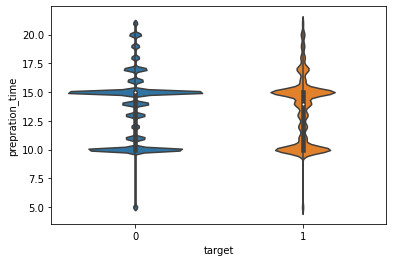

In [30]:
sns.violinplot(x="target", y="prepration_time", data=data)

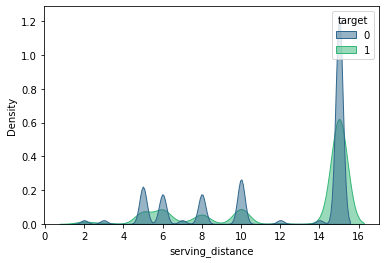

In [31]:
sns.kdeplot(data=data, x="serving_distance", hue="target", fill=True, common_norm=False, alpha=0.5, 
            palette="viridis", legend=True)

In [32]:
data['discount_percentage'].value_counts()  #find the number of counts of each discount percenatge values

0.0     5512280
10.0      58024
50.0      58024
35.0      58024
15.0      58024
Name: discount_percentage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


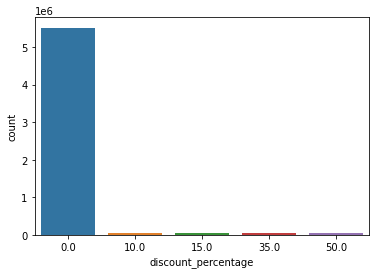

In [33]:
sns.countplot('discount_percentage',data = data)

From above bar graph we can see most of orders do not have any discount on them

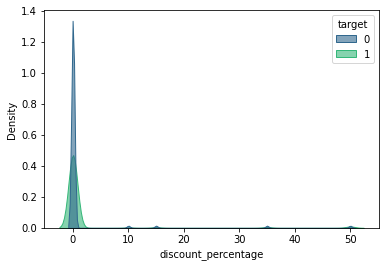

In [34]:
sns.kdeplot(data=data, x="discount_percentage", hue="target", fill=True, common_norm=False, alpha=0.6, 
            palette="viridis", legend=True)

(0.0, 15.0)

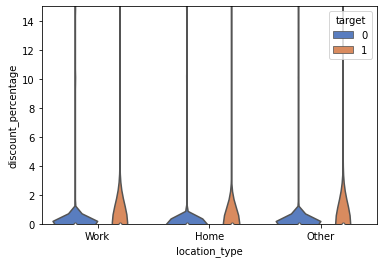

In [35]:
sns.violinplot(y="discount_percentage", x="location_type", hue="target",
                    data=data, palette="muted")
plt.ylim([0,15])

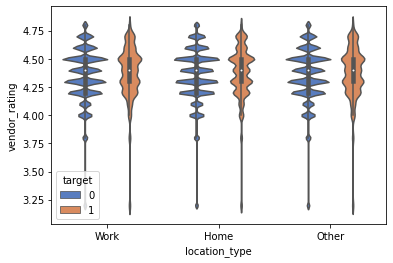

In [36]:
sns.violinplot(y="vendor_rating", x="location_type", hue="target",
                    data=data, palette="muted")

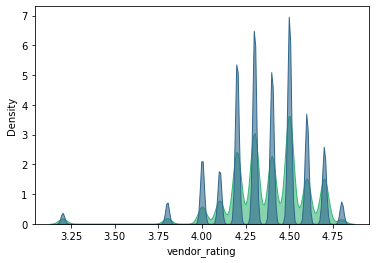

In [37]:
sns.kdeplot(data=data, x="vendor_rating", hue="target", fill=True, common_norm=False, alpha=0.6, 
            palette="viridis", legend=False)

In [38]:
print(min(data['serving_distance'])) #calculate least value of serving distance
max(data['serving_distance']) # calculate maximum value of serving distance

2.0


15.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


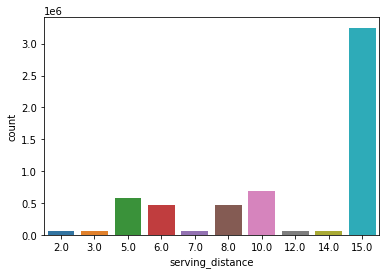

In [39]:
sns.countplot("serving_distance",data = data)

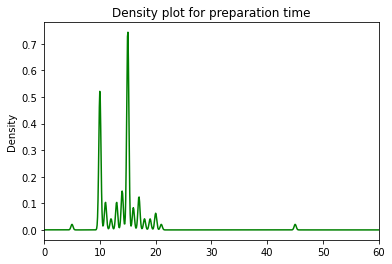

In [ ]:
# visualising prepration time density plot
data.prepration_time.plot.density(color='green')
plt.title('Density plot for preparation time')
plt.xlim([0,60])
plt.show()

Most of the data is crowded between 10 and 20 which is ideal and practical for preparation time for a order

Fro above box plot there is an outlier which is 45 minutes for preparation time.This data point can affect model and also seems as impratical for preparation time

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


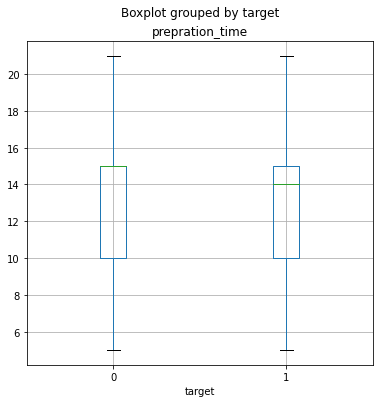

In [40]:
data.boxplot('prepration_time', by='target', figsize=(6, 6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


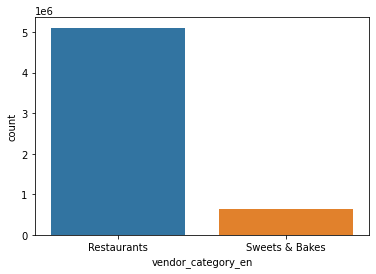

In [41]:
sns.countplot('vendor_category_en',data = data)

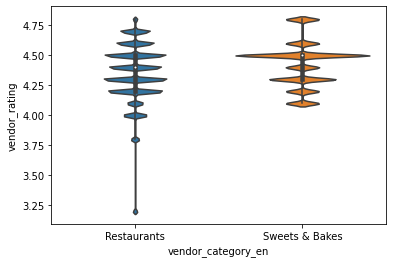

In [42]:
sns.violinplot(x='vendor_category_en',y ='vendor_rating', data= data)

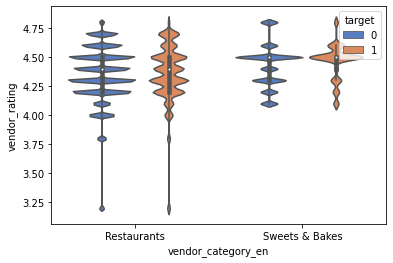

In [43]:
sns.violinplot(y="vendor_rating", x="vendor_category_en", hue="target",
                    data=data, palette="muted")

**ORDERS**

In [44]:
orders = pd.read_csv("/content/orders.csv")
orders.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [45]:
orders.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR'],
      dtype='object')

In [46]:
orders.shape #know the number of columns and row in orders table

(135303, 26)

In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [48]:
len(orders['customer_id'].unique())

27445

In [49]:
len(orders['vendor_id'].unique())

100

In [50]:
print(orders['is_favorite'].isnull().sum())
orders['is_favorite'].value_counts()

35195


No     98449
Yes     1659
Name: is_favorite, dtype: int64

In [51]:
# Replace Nan with "others" for 'is_favorite' feature
orders['is_favorite'] = orders['is_favorite'].replace(np.nan,"others")  
orders['is_favorite'].value_counts()

No        98449
others    35195
Yes        1659
Name: is_favorite, dtype: int64

In [52]:
print(orders["vendor_rating"].isnull().sum()) # finding number of null values for "vendor rating"
orders["vendor_rating"].value_counts()

90083


0.0    25175
5.0    14212
4.0     2748
3.0     1426
1.0     1029
2.0      630
Name: vendor_rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


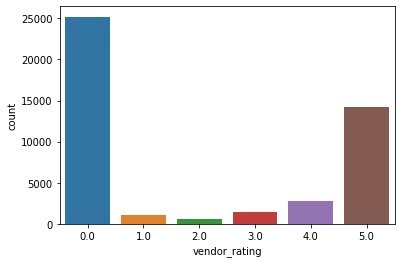

In [53]:
# visualise frequency distribution of "vendor rating"
sns.countplot("vendor_rating",data = orders)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


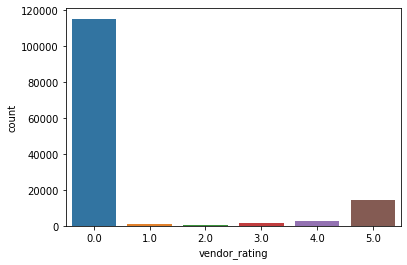

In [54]:
# Replace nan value with 0 for 'vendor rating'
orders['vendor_rating'] = orders['vendor_rating'].replace(np.nan,0)
sns.countplot("vendor_rating",data = orders)

From above plot most of the ratings are 0 which means most of orders are not rated

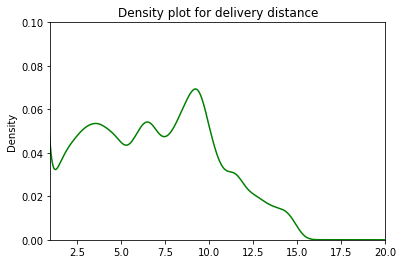

In [55]:
# visualaize density plot for "delivery distance"
orders.deliverydistance.plot.density(color='green')
plt.title('Density plot for delivery distance')
plt.xlim([1,20])
plt.ylim([0,0.10])
plt.show()

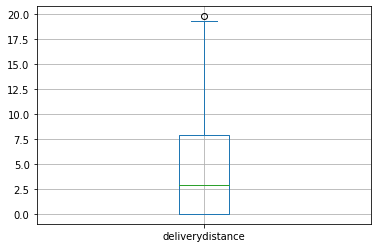

In [56]:
orders['deliverydistance'].plot.box(grid = True)

In [57]:
#calculate median of delivery_distance and replace 0 with it 
median_delivery_distance = np.median(orders['deliverydistance'])
orders['deliverydistance'] = orders['deliverydistance'].replace(0,median_delivery_distance)
median_delivery_distance

2.9

In [58]:
# finding IQR for 'deliverydistance'
q1 = np.quantile(orders['deliverydistance'],0.25)
q3 = np.quantile(orders['deliverydistance'],0.75)
IQR = q3 - q1
IQR,q1,q3
print(IQR,q1,q3)
print(q3 + (1.5 * IQR))
print(q1 - (1.5 * IQR))

5.02 2.9 7.92
15.45
-4.629999999999999


In [59]:
# dropping the rows where the value of 'deliverydistance' is greater than q3 + (1.5*IQR)

filtered_data = orders[(orders['deliverydistance'] >= q3 + (1.5*IQR))].index
orders.drop(filtered_data,inplace = True)
orders.shape

(135294, 26)

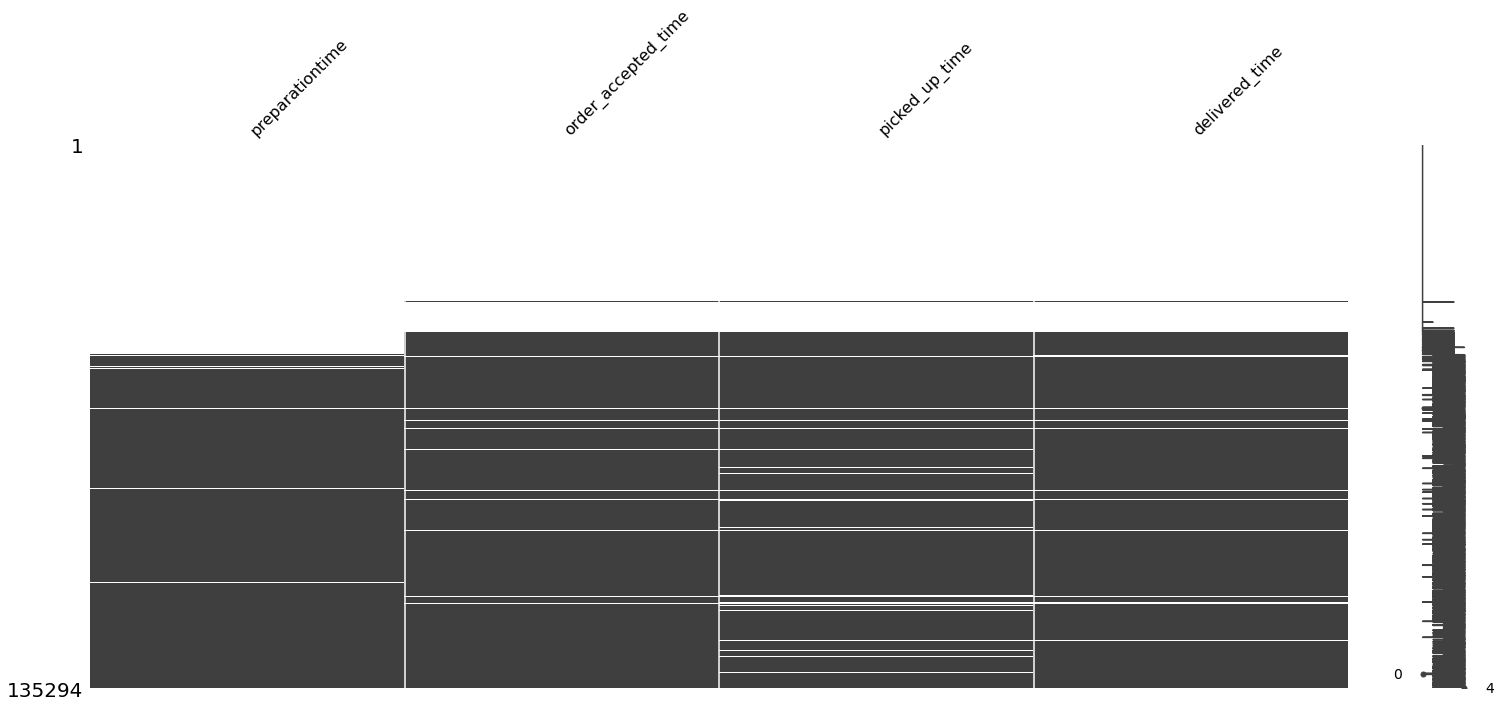

In [60]:
# visualise of how much of distribution of data is null 
#Here white lines represent null values and black values represent valid values 
import missingno as msno
order_matrix =orders[['preparationtime','order_accepted_time','picked_up_time','delivered_time']]
msno.matrix(order_matrix)

In [61]:
# check the fromat of 'delivered_time' data
orders['delivered_time'].tail()

135298    2020-03-01 00:29:42
135299    2020-03-01 01:03:14
135300    2020-03-01 00:36:37
135301    2020-03-01 00:36:52
135302    2020-03-01 00:28:06
Name: delivered_time, dtype: object

In [62]:
# convert the datetime object to seconds for feature 'delivered_time'
from numpy.core.numeric import NaN
import datetime

def convert_date_into_seconds(date_string):
  if date_string != 0:
    date = datetime.datetime.strptime(date_string, "%Y-%m-%d  %H:%M:%S") 
    timestamp = datetime.datetime.timestamp(date)
    return timestamp

orders['delivered_time'] = orders['delivered_time'].fillna(0)  # replace null values with 0
orders['delivered_time'] = orders['delivered_time'].apply(convert_date_into_seconds) 
orders['delivered_time'].tail()

135298    1.583023e+09
135299    1.583025e+09
135300    1.583023e+09
135301    1.583023e+09
135302    1.583022e+09
Name: delivered_time, dtype: float64

In [63]:
# check the fromat of 'order_accepted_time' data
orders['order_accepted_time'].tail()

135298    2020-02-29 23:48:47
135299    2020-02-29 23:49:50
135300    2020-02-29 23:49:16
135301    2020-02-29 23:54:38
135302    2020-02-29 23:58:04
Name: order_accepted_time, dtype: object

In [64]:
# convert the datetime object to seconds for feature "order_accepted_time"

orders['order_accepted_time'] = orders['order_accepted_time'].fillna(0)
orders['order_accepted_time'] = orders['order_accepted_time'].apply(convert_date_into_seconds)
orders['order_accepted_time'].tail()

135298    1.583020e+09
135299    1.583020e+09
135300    1.583020e+09
135301    1.583020e+09
135302    1.583021e+09
Name: order_accepted_time, dtype: float64

In [65]:
# compute the total time taken for a parcel to be delivered from the time it is accepted 
orders['total_time_taken'] = (orders['delivered_time'] - orders['order_accepted_time'])/60 
# convert seconds to minutes by dividing 60

orders['total_time_taken'].tail()

135298    40.916667
135299    73.400000
135300    47.350000
135301    42.233333
135302    30.033333
Name: total_time_taken, dtype: float64

In [66]:
orders['total_time_taken'].isnull().sum()

49667

In [67]:
# extracting out only non null value to find the median
orders_without_null = orders[~orders['total_time_taken'].isnull()]
orders_without_null.shape

(85627, 27)

In [68]:
#calculate the median
median_total_time_taken = np.median(orders_without_null['total_time_taken'])
median_total_time_taken

61.983333333333334

In [69]:
#replacing nan values with median of total_time_taken feature
orders['total_time_taken'] = orders['total_time_taken'].replace(np.nan,median_total_time_taken)

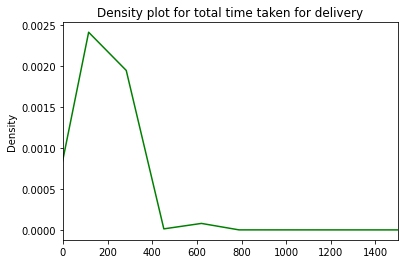

In [70]:
# density plot for total_time_taken feature
orders.total_time_taken.plot.density(color='green')
plt.title('Density plot for total time taken for delivery')
plt.xlim([0,1500])
plt.show()

(0.0, 200.0)

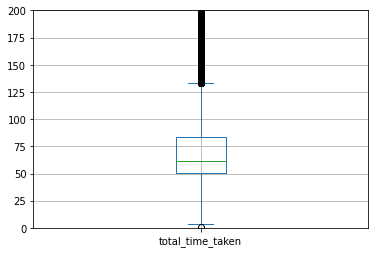

In [71]:
orders['total_time_taken'].plot.box(grid = True)
plt.ylim([0,200])

Box plot above shows there are many outliers.130 is the maximum point 

In [72]:
# drop the orders which take time more than 130 minutes and less than 20 mins
# this makes sense 
filtered_data = orders[(orders["total_time_taken"] > 130) | (orders["total_time_taken"] < 20)].index
orders.drop(filtered_data,inplace = True)
orders.shape

(104711, 27)

**Join two tables data and orders**

In [73]:
data.columns

Index(['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       

In [74]:
orders.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR', 'total_time_taken'],
      dtype='object')

In [75]:
data = data [['customer_id','gender','vendor_category_en','OpeningTime','location_type','location_number','id',"discount_percentage","vendor_rating",
             "serving_distance","prepration_time",'latitude_x','longitude_x','latitude_y','longitude_y','vendor_tag_name',
              'CID X LOC_NUM X VENDOR','target']] #selecting only required columns

data.rename(columns = {'vendor_rating':'mean_rating'},inplace = True) #rename vendor rating with mean rating
columns = ['customer_id','id']

data['all'] = data[columns].apply(lambda row: '_'.join(row.values.astype(str)),axis=1) #create new column "all" which is the combination of customer id and vendor id

data.head()



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,gender,vendor_category_en,OpeningTime,location_type,location_number,id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all
0,TCHWPBT,Male,Restaurants,11:00AM-11:30PM,Work,0,4,0.0,4.4,6.0,15,-96.44,-67.2,-0.5884,0.7544,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",TCHWPBT X 0 X 4,0,TCHWPBT_4
1,TCHWPBT,Male,Restaurants,08:30AM-10:30PM,Work,0,13,0.0,4.7,5.0,14,-96.44,-67.2,-0.4717,0.7446,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",TCHWPBT X 0 X 13,0,TCHWPBT_13
2,TCHWPBT,Male,Restaurants,08:00AM-10:45PM,Work,0,20,0.0,4.5,8.0,19,-96.44,-67.2,-0.4075,0.6436,"Breakfast,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 20,0,TCHWPBT_20
3,TCHWPBT,Male,Restaurants,10:59AM-10:30PM,Work,0,23,0.0,4.5,5.0,16,-96.44,-67.2,-0.5854,0.7540,"Burgers,Desserts,Fries,Salads",TCHWPBT X 0 X 23,0,TCHWPBT_23
4,TCHWPBT,Male,Restaurants,11:00AM-11:45PM,Work,0,28,0.0,4.4,15.0,10,-96.44,-67.2,0.4807,0.5527,Burgers,TCHWPBT X 0 X 28,0,TCHWPBT_28


Join orders and data replace vendor rating(nan) values with Vendor mean rating

In [76]:
data.shape

(5744376, 19)

In [77]:
orders = orders [['customer_id','vendor_id','deliverydistance','vendor_rating','preparationtime','is_favorite',
                  'total_time_taken','vendor_discount_amount','promo_code','grand_total','item_count','driver_rating']] #selecting required columns
orders.rename(columns = {'vendor_id':'id'},inplace = True) #renaming vendor_id with id

columns = ['customer_id','id']

orders['all'] = orders[columns].apply(lambda row: '_'.join(row.values.astype(str)),axis=1) #create new column "all" which is the combination of customer id and vendor id

orders.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,id,deliverydistance,vendor_rating,preparationtime,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating,all
0,92PEE24,105,2.9,0.0,NaN,others,61.983333,0.0,NaN,7.6,1.0,0.0,92PEE24_105
1,QS68UD8,294,2.9,0.0,NaN,others,61.983333,0.0,NaN,8.7,1.0,0.0,QS68UD8_294
2,MB7VY5F,83,2.9,0.0,NaN,others,61.983333,0.0,NaN,14.4,2.0,0.0,MB7VY5F_83
3,KDJ951Y,90,2.9,0.0,NaN,others,61.983333,0.0,NaN,7.1,1.0,0.0,KDJ951Y_90
4,BAL0RVT,83,2.9,0.0,NaN,others,61.983333,0.0,NaN,27.2,4.0,0.0,BAL0RVT_83


In [78]:
orders.tail()

,customer_id,id,deliverydistance,vendor_rating,preparationtime,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating,all
135298,L6LFY6H,67,1.75,0.0,40.0,No,40.916667,0.0,NaN,13.3,1.0,0.0,L6LFY6H_67
135299,2GMMVGI,79,12.81,5.0,60.0,No,73.400000,0.0,NaN,9.5,3.0,4.0,2GMMVGI_79
135300,LYTAAV0,28,11.15,0.0,45.0,No,47.350000,0.0,NaN,18.2,4.0,0.0,LYTAAV0_28
135301,NEV9A5D,841,2.29,0.0,35.0,No,42.233333,0.0,NUE5BZAA7,7.7,3.0,0.0,NEV9A5D_841
135302,77KCRC1,79,3.92,0.0,40.0,No,30.033333,0.0,NaN,6.8,1.0,0.0,77KCRC1_79


In [79]:
orders.shape

(104711, 13)

**Join or merge two datasets(data and orders) on newly created column all**

In [80]:
dataset =pd.merge(data,orders,on='all',how='inner')
dataset.head()

,customer_id_x,gender,vendor_category_en,OpeningTime,location_type,location_number,id_x,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all,customer_id_y,id_y,deliverydistance,vendor_rating,preparationtime,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating
0,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,Work,0,113,0.0,4.7,15.0,10,-96.4400,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 113,0,TCHWPBT_113,TCHWPBT,113,2.9,5.0,NaN,No,61.983333,0.0,NaN,7.9,NaN,5.0
1,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,Home,1,113,0.0,4.7,15.0,10,-96.6000,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 1 X 113,0,TCHWPBT_113,TCHWPBT,113,2.9,5.0,NaN,No,61.983333,0.0,NaN,7.9,NaN,5.0
2,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,NaN,2,113,0.0,4.7,15.0,10,-0.1287,-78.56,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 2 X 113,1,TCHWPBT_113,TCHWPBT,113,2.9,5.0,NaN,No,61.983333,0.0,NaN,7.9,NaN,5.0
3,TCHWPBT,Male,Restaurants,08:30PM-11:59PM,Work,0,237,0.0,4.6,15.0,15,-96.4400,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 0 X 237,1,TCHWPBT_237,TCHWPBT,237,2.9,0.0,NaN,others,61.983333,0.0,NaN,5.4,1.0,0.0
4,TCHWPBT,Male,Restaurants,08:30PM-11:59PM,Home,1,237,0.0,4.6,15.0,15,-96.6000,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 1 X 237,0,TCHWPBT_237,TCHWPBT,237,2.9,0.0,NaN,others,61.983333,0.0,NaN,5.4,1.0,0.0


In [81]:
dataset.shape

(297359, 31)

In [82]:
#Change some columns name and drop the same column
dataset.rename(columns = {"customer_id_x": "customer_id"}, inplace = True)
dataset.rename(columns = {"id_x": "vendor_id"}, inplace = True)
dataset.drop(['preparationtime'],axis=1,inplace=True)
dataset.drop(['customer_id_y','id_y'],axis=1,inplace=True)
dataset.shape

(297359, 28)

In [83]:
dataset.head()

,customer_id,gender,vendor_category_en,OpeningTime,location_type,location_number,vendor_id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all,deliverydistance,vendor_rating,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating
0,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,Work,0,113,0.0,4.7,15.0,10,-96.4400,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 113,0,TCHWPBT_113,2.9,5.0,No,61.983333,0.0,NaN,7.9,NaN,5.0
1,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,Home,1,113,0.0,4.7,15.0,10,-96.6000,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 1 X 113,0,TCHWPBT_113,2.9,5.0,No,61.983333,0.0,NaN,7.9,NaN,5.0
2,TCHWPBT,Male,Restaurants,10:59AM-10:59PM,NaN,2,113,0.0,4.7,15.0,10,-0.1287,-78.56,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 2 X 113,1,TCHWPBT_113,2.9,5.0,No,61.983333,0.0,NaN,7.9,NaN,5.0
3,TCHWPBT,Male,Restaurants,08:30PM-11:59PM,Work,0,237,0.0,4.6,15.0,15,-96.4400,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 0 X 237,1,TCHWPBT_237,2.9,0.0,others,61.983333,0.0,NaN,5.4,1.0,0.0
4,TCHWPBT,Male,Restaurants,08:30PM-11:59PM,Home,1,237,0.0,4.6,15.0,15,-96.6000,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 1 X 237,0,TCHWPBT_237,2.9,0.0,others,61.983333,0.0,NaN,5.4,1.0,0.0


In [84]:
len(dataset['customer_id'].unique())

24442

In [85]:
len(dataset['vendor_id'].unique())

99

In [86]:
dataset = dataset.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


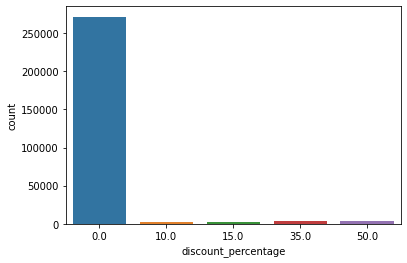

In [87]:
sns.countplot('discount_percentage',data = dataset)

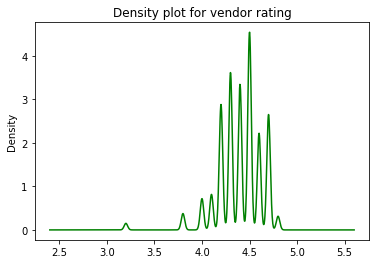

In [88]:
dataset.mean_rating.plot.density(color='green')
plt.title('Density plot for vendor rating')
plt.show()

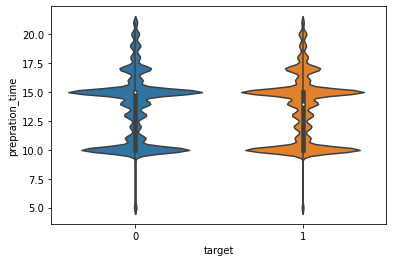

In [89]:
sns.violinplot(x='target',y ='prepration_time', data= dataset)

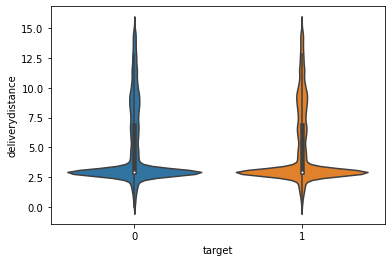

In [90]:
sns.violinplot(x='target',y ='deliverydistance', data= dataset)

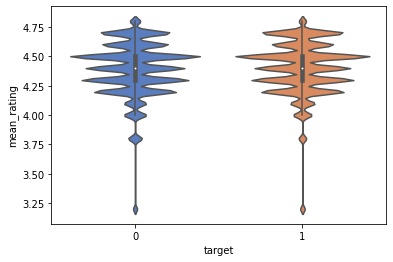

In [91]:
sns.violinplot(y="mean_rating",x ="target",
                    data=dataset, palette="muted")

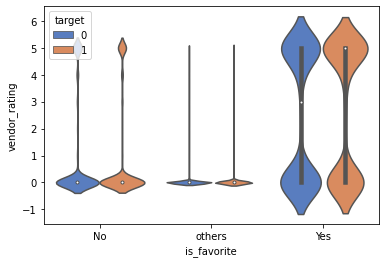

In [92]:
sns.violinplot(x="is_favorite", y="vendor_rating", hue="target",
                    data=dataset, palette="muted")

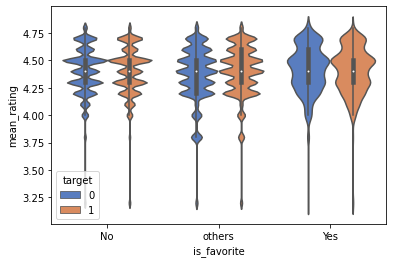

In [93]:
sns.violinplot(x="is_favorite", y="mean_rating", hue="target",
                    data=dataset, palette="muted")

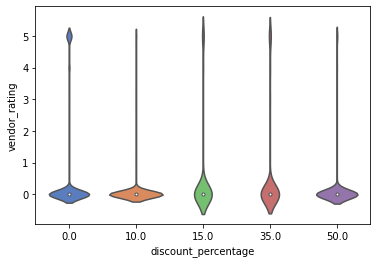

In [94]:
sns.violinplot(x="discount_percentage", y="vendor_rating",
                    data=dataset, palette="muted")

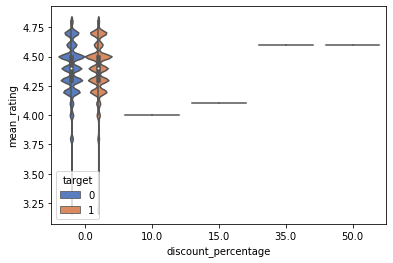

In [95]:
sns.violinplot(x="discount_percentage", y="mean_rating", hue="target",
                    data=dataset, palette="muted")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


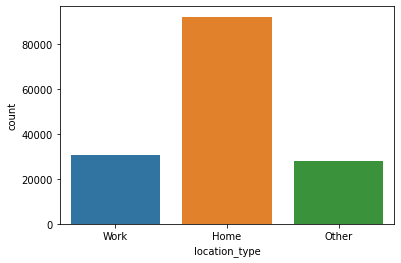

In [96]:
sns.countplot('location_type',data = dataset)

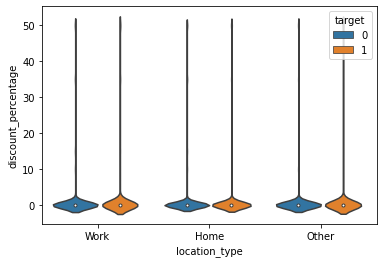

In [97]:
sns.violinplot(y="discount_percentage", x="location_type",hue = 'target',data = dataset)

In [98]:
dataset['gender'].isnull().sum()

54081

In [99]:
dataset['gender'] = dataset['gender'].replace(np.nan,'others') # replacing nan values with others

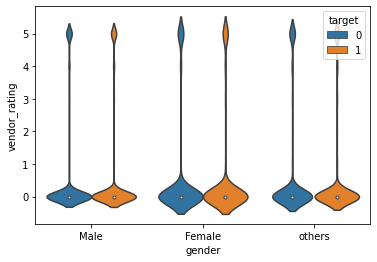

In [ ]:
sns.violinplot(y='vendor_rating', x="gender",hue = 'target',data = dataset)

In [100]:
dataset['location_type'].isnull().sum()

133328

In [101]:
dataset['location_type'] = dataset['location_type'].replace(np.nan,'Other')# replacing nan values with others

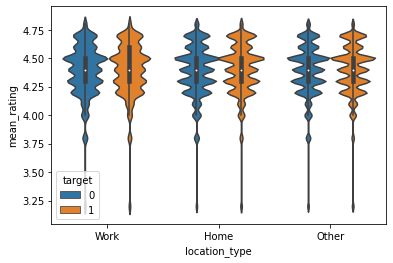

In [102]:
sns.violinplot(y="mean_rating", x="location_type",hue = 'target',data = dataset)

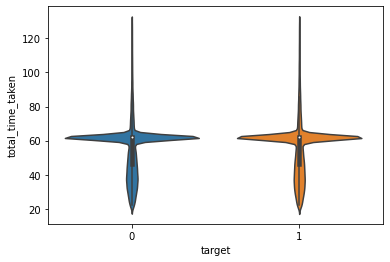

In [103]:
sns.violinplot(y="total_time_taken", x="target",data = dataset)

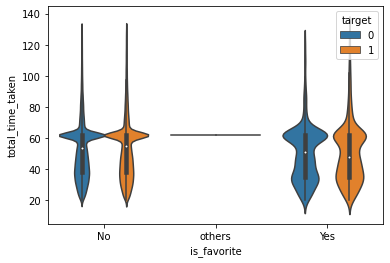

In [104]:
sns.violinplot(y="total_time_taken", x="is_favorite",hue = 'target',data = dataset)

Now the data is cleaned and pre-preocessed and ready for modelling phase

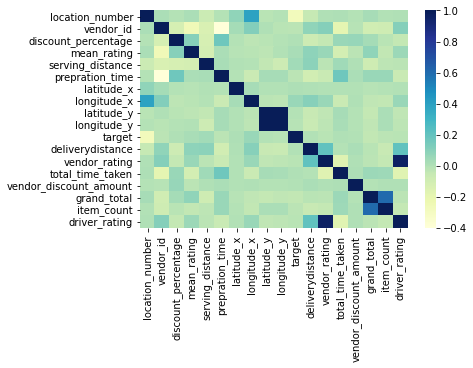

In [105]:
sns.heatmap(dataset.corr(),cmap="YlGnBu")

From above heatmap I cant find any positively correlation between two variables or features

In [106]:
dataset.corr()

,location_number,vendor_id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,target,deliverydistance,vendor_rating,total_time_taken,vendor_discount_amount,grand_total,item_count,driver_rating
location_number,1.000000,0.016292,-0.004395,0.019652,-0.068315,-0.005917,0.081883,0.394813,-0.014789,-0.006899,-0.275430,-0.047749,0.005707,0.011365,-0.004782,0.029091,0.002448,0.005794
vendor_id,0.016292,1.000000,-0.113866,-0.256070,-0.130794,-0.401419,0.032557,0.115972,0.008883,-0.015113,-0.021383,0.084510,0.107744,-0.187185,-0.010435,-0.093753,-0.082857,0.108798
discount_percentage,-0.004395,-0.113866,1.000000,0.104592,-0.119060,0.169547,-0.002152,-0.028874,-0.016976,-0.004010,0.005706,-0.073659,-0.040327,0.062116,0.068457,0.035428,-0.014593,-0.041857
mean_rating,0.019652,-0.256070,0.104592,1.000000,-0.108875,0.014694,-0.010884,-0.016563,-0.026043,-0.001550,0.021929,0.090071,0.061966,-0.102015,-0.020754,0.085060,-0.039081,0.056206
serving_distance,-0.068315,-0.130794,-0.119060,-0.108875,1.000000,0.022099,-0.001061,-0.004219,-0.035362,-0.077312,0.036716,0.091514,-0.019808,0.046969,0.005766,-0.080232,-0.027044,-0.022601
prepration_time,-0.005917,-0.401419,0.169547,0.014694,0.022099,1.000000,-0.006577,-0.066187,0.030746,0.029008,-0.020414,-0.095548,-0.058357,0.167985,0.018076,0.060457,0.059317,-0.060203
latitude_x,0.081883,0.032557,-0.002152,-0.010884,-0.001061,-0.006577,1.000000,0.028958,0.002153,-0.000535,0.011454,0.004051,0.000989,0.003572,-0.000132,-0.007914,-0.003720,0.000730
longitude_x,0.394813,0.115972,-0.028874,-0.016563,-0.004219,-0.066187,0.028958,1.000000,-0.021602,-0.025797,0.063598,0.102634,0.060545,-0.063311,0.005668,-0.031411,-0.038723,0.060549
latitude_y,-0.014789,0.008883,-0.016976,-0.026043,-0.035362,0.030746,0.002153,-0.021602,1.000000,0.995899,-0.004340,-0.052951,-0.029354,0.025877,-0.002396,-0.042188,0.016722,-0.029324
longitude_y,-0.006899,-0.015113,-0.004010,-0.001550,-0.077312,0.029008,-0.000535,-0.025797,0.995899,1.000000,-0.010208,-0.057145,-0.028203,0.022083,-0.003189,-0.029546,0.019549,-0.027849


In [107]:
dataset['location_type'] = dataset['location_type'].replace(['Work','Home','Other'],[0,1,2]) #replacing work,home and others with 0,1 and 2 correspondingly
dataset['location_type']

0         0
1         1
2         2
3         0
4         1
         ..
297354    2
297355    1
297356    1
297357    2
297358    2
Name: location_type, Length: 283587, dtype: int64

In [108]:
dataset['gender'] = dataset['gender'].replace(['Male','Female','others'],[0,1,2]) #replacing male and female with 0 and 1 correspondingly
dataset['gender']

0         0
1         0
2         0
3         0
4         0
         ..
297354    2
297355    2
297356    2
297357    1
297358    1
Name: gender, Length: 283587, dtype: int64

In [109]:
dataset['vendor_category_en'] = dataset['vendor_category_en'].replace(['Restaurants','Sweets & Bakes'],[0,1]) #replacing male and female with 0 and 1 correspondingly
dataset['vendor_category_en']

0         0
1         0
2         0
3         0
4         0
         ..
297354    0
297355    0
297356    0
297357    0
297358    0
Name: vendor_category_en, Length: 283587, dtype: int64

In [110]:
dataset['is_favorite'] = dataset['is_favorite'].replace(['Yes','No','others'],[0,1,2]) #replacing male and female with 0 and 1 correspondingly
dataset['is_favorite']

0         1
1         1
2         1
3         2
4         2
         ..
297354    1
297355    1
297356    1
297357    1
297358    1
Name: is_favorite, Length: 283587, dtype: int64

In [111]:
dataset.head()

,customer_id,gender,vendor_category_en,OpeningTime,location_type,location_number,vendor_id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all,deliverydistance,vendor_rating,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating
0,TCHWPBT,0,0,10:59AM-10:59PM,0,0,113,0.0,4.7,15.0,10,-96.4400,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0
1,TCHWPBT,0,0,10:59AM-10:59PM,1,1,113,0.0,4.7,15.0,10,-96.6000,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 1 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0
2,TCHWPBT,0,0,10:59AM-10:59PM,2,2,113,0.0,4.7,15.0,10,-0.1287,-78.56,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 2 X 113,1,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0
3,TCHWPBT,0,0,08:30PM-11:59PM,0,0,237,0.0,4.6,15.0,15,-96.4400,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 0 X 237,1,TCHWPBT_237,2.9,0.0,2,61.983333,0.0,NaN,5.4,1.0,0.0
4,TCHWPBT,0,0,08:30PM-11:59PM,1,1,237,0.0,4.6,15.0,15,-96.6000,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 1 X 237,0,TCHWPBT_237,2.9,0.0,2,61.983333,0.0,NaN,5.4,1.0,0.0


In [112]:
dataset.shape

(283587, 28)

In [113]:
d = dataset[['customer_id','vendor_id','vendor_rating']]
#d = d.drop_duplicates()

user_item_rating = d.pivot_table(index='customer_id', columns='vendor_id', values='vendor_rating')
user_item_rating.replace(np.nan,0,inplace =True)
user_item_rating
#d.head(5)

vendor_id,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,...,259,265,271,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000THBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002510Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005ECL6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0075AM7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009UFS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZVGIVK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZVLIB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZWKMGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#https://beckernick.github.io/matrix-factorization-recommender/

ui_matrix = user_item_rating.to_numpy()
user_ratings_mean = np.mean(ui_matrix, axis = 1)
ui_matrix_demeaned = ui_matrix - user_ratings_mean.reshape(-1, 1)

In [116]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ui_matrix_demeaned, k = 50)

In [117]:
U.shape,sigma.shape,Vt.shape

((24442, 50), (50,), (50, 99))

In [118]:
sigma = np.diag(sigma)

In [119]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_item_rating.columns)
preds_df.shape

(24442, 99)

In [120]:
preds_df['customer_id'] = user_item_rating.index
preds_df.head(5)

vendor_id,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,...,265,271,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907,customer_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000THBA
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,002510Y
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005ECL6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0075AM7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,009UFS1


In [121]:
preds_df = preds_df.set_index('customer_id')
preds_df

vendor_id,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,...,259,265,271,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000THBA,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
002510Y,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
005ECL6,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
0075AM7,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
009UFS1,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000

In [122]:
from sklearn.decomposition import NMF

model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(user_item_rating)
H = model.components_
W.shape,H.shape

((24442, 10), (10, 99))

In [123]:
user_predicted_ratings_NMF = np.dot(W,H)
preds_df_NMF = pd.DataFrame(user_predicted_ratings_NMF, columns = user_item_rating.columns)
preds_df_NMF.shape

(24442, 99)

In [124]:
preds_df_NMF['customer_id'] = user_item_rating.index
preds_df_NMF.head(5)

vendor_id,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,...,265,271,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907,customer_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000THBA
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,002510Y
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005ECL6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0075AM7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,009UFS1


In [125]:
preds_df_NMF = preds_df_NMF.set_index('customer_id')
preds_df_NMF

vendor_id,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,...,259,265,271,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000THBA,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
002510Y,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
005ECL6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
0075AM7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
009UFS1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [130]:
preds_df_NMF.to_csv('preds_df_NMF.csv')

In [127]:
W = pd.DataFrame(W)
W

,0,1,2,3,4,5,6,7,8,9
0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
24437,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
24438,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
24439,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
24440,0.09972,0.0,0.087696,0.0,0.033583,0.046515,0.169708,0.174045,0.0,2.223382


In [128]:
W['customer_id'] = user_item_rating.index
W.head(5)

,0,1,2,3,4,5,6,7,8,9,customer_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000THBA
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,002510Y
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005ECL6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0075AM7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,009UFS1


In [129]:
W = W.set_index('customer_id')
W

,0,1,2,3,4,5,6,7,8,9
customer_id,,,,,,,,,,
000THBA,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
002510Y,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
005ECL6,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0075AM7,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
009UFS1,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
ZZVGIVK,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ZZVLIB5,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ZZWKMGG,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [132]:
W.to_csv('users_10_features.csv')

In [134]:
dataset['OpeningTime'].fillna('-',inplace=True) 

time_split= dataset.OpeningTime.str.split('-')
open=time_split.str.get(0)
close=time_split.str.get(1)

dataset['Open']=open
dataset['Close']=close

# Fill the blank to null value
dataset['Open'].fillna('',inplace=True) 
dataset['Close'].fillna('',inplace=True)

In [135]:
dataset.head(5)

,customer_id,gender,vendor_category_en,OpeningTime,location_type,location_number,vendor_id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all,deliverydistance,vendor_rating,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating,Open,Close
0,TCHWPBT,0,0,10:59AM-10:59PM,0,0,113,0.0,4.7,15.0,10,-96.4400,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0,10:59AM,10:59PM
1,TCHWPBT,0,0,10:59AM-10:59PM,1,1,113,0.0,4.7,15.0,10,-96.6000,-67.20,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 1 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0,10:59AM,10:59PM
2,TCHWPBT,0,0,10:59AM-10:59PM,2,2,113,0.0,4.7,15.0,10,-0.1287,-78.56,0.6304,0.5270,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 2 X 113,1,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0,10:59AM,10:59PM
3,TCHWPBT,0,0,08:30PM-11:59PM,0,0,237,0.0,4.6,15.0,15,-96.4400,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 0 X 237,1,TCHWPBT_237,2.9,0.0,2,61.983333,0.0,NaN,5.4,1.0,0.0,08:30PM,11:59PM
4,TCHWPBT,0,0,08:30PM-11:59PM,1,1,237,0.0,4.6,15.0,15,-96.6000,-67.20,-0.9434,0.0817,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",TCHWPBT X 1 X 237,0,TCHWPBT_237,2.9,0.0,2,61.983333,0.0,NaN,5.4,1.0,0.0,08:30PM,11:59PM


In [136]:
def morning_func(x) :
  if x == "" :
    return None
  else :
    x1 = int(x[:2].replace(":", "").replace("a", ""))
    x2 = x[-2:]
    if (x1>=7 and x1 <= 10) and x2 == ("AM" or "am"): 
      return 1
    elif x1 <=10 and len(x) <= 2 :
      return 1
    else :
      return 0

def afternoon_func(x) :
  if x == "" :
    return None
  else :
    x1 = int(x[:2].replace(":", "").replace("a", ""))
    x2 = x[-2:]
    if x1 <= 1 and x2 == "PM": 
      return 1
    elif x1 == 12 and x2 == "PM":
      return 1
    elif x2 == ("AM" or "am"):
      return 1
    elif x1 <=10 and len(x) <= 2 :
      return 1
    else :
      return 0

def evening_func(x) :
  if x == "" :
    return None
  else :
    x1 = int(x[:2].replace(":",""))
    x2 = x[-2:]
    if (x1 >= 6 and x2 == "PM") or x2 == ("Am" or "am") :
      return 1
    elif x1 >= 22 and len(x)<=2:
      return 1      
    else :
      return 0

dataset["morning"] = dataset["Open"].apply(morning_func)
dataset["afternoon"] = dataset["Open"].apply(afternoon_func)
dataset["evening"] = dataset["Close"].apply(evening_func)

dataset[:2]

,customer_id,gender,vendor_category_en,OpeningTime,location_type,location_number,vendor_id,discount_percentage,mean_rating,serving_distance,prepration_time,latitude_x,longitude_x,latitude_y,longitude_y,vendor_tag_name,CID X LOC_NUM X VENDOR,target,all,deliverydistance,vendor_rating,is_favorite,total_time_taken,vendor_discount_amount,promo_code,grand_total,item_count,driver_rating,Open,Close,morning,afternoon,evening
0,TCHWPBT,0,0,10:59AM-10:59PM,0,0,113,0.0,4.7,15.0,10,-96.44,-67.2,0.6304,0.527,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 0 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0,10:59AM,10:59PM,1.0,1.0,1.0
1,TCHWPBT,0,0,10:59AM-10:59PM,1,1,113,0.0,4.7,15.0,10,-96.60,-67.2,0.6304,0.527,"Arabic,Desserts,Free Delivery,Indian",TCHWPBT X 1 X 113,0,TCHWPBT_113,2.9,5.0,1,61.983333,0.0,NaN,7.9,NaN,5.0,10:59AM,10:59PM,1.0,1.0,1.0


In [137]:
dataset.columns

Index(['customer_id', 'gender', 'vendor_category_en', 'OpeningTime',
       'location_type', 'location_number', 'vendor_id', 'discount_percentage',
       'mean_rating', 'serving_distance', 'prepration_time', 'latitude_x',
       'longitude_x', 'latitude_y', 'longitude_y', 'vendor_tag_name',
       'CID X LOC_NUM X VENDOR', 'target', 'all', 'deliverydistance',
       'vendor_rating', 'is_favorite', 'total_time_taken',
       'vendor_discount_amount', 'promo_code', 'grand_total', 'item_count',
       'driver_rating', 'Open', 'Close', 'morning', 'afternoon', 'evening'],
      dtype='object')

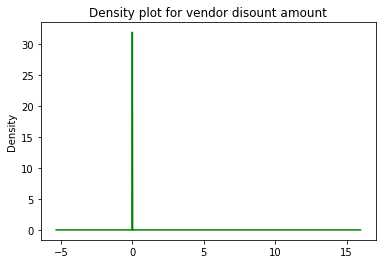

In [138]:
#sns.countplot('vendor_discount_amount',data = dataset)
dataset.vendor_discount_amount.plot.density(color='green')
plt.title('Density plot for vendor disount amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


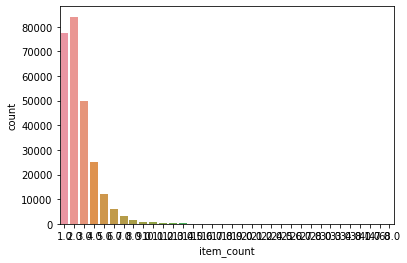

In [139]:
sns.countplot('item_count',data=dataset)

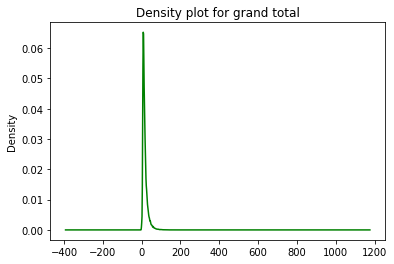

In [140]:
dataset.grand_total.plot.density(color='green')
plt.title('Density plot for grand total')
plt.show()

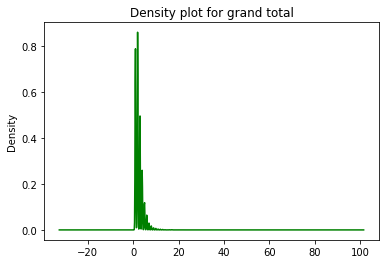

In [141]:
dataset.item_count.plot.density(color='green')
plt.title('Density plot for grand total')
plt.show()

In [142]:
X = dataset[['customer_id', 'gender', 'vendor_category_en','location_number', 'vendor_id',
       'mean_rating', 'serving_distance', 'prepration_time','deliverydistance',
       'vendor_rating', 'is_favorite', 'total_time_taken','driver_rating', 'morning', 'afternoon', 'evening']]
y = dataset['target']

In [143]:
X = pd.merge(X,W,on='customer_id',how='inner')
X.shape

(283587, 26)

In [144]:
vendor_ratings= []
for i,j in zip(X['customer_id'],X['vendor_id']):
    vendor_ratings.append(preds_df_NMF.loc[i][j])
X['vendor_rating1'] = vendor_ratings
X.head(5)

,customer_id,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,vendor_rating,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1
0,TCHWPBT,0,0,0,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331
1,TCHWPBT,0,0,1,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331
2,TCHWPBT,0,0,2,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331
3,TCHWPBT,0,0,0,237,4.6,15.0,15,2.9,0.0,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,TCHWPBT,0,0,1,237,4.6,15.0,15,2.9,0.0,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [145]:
import pickle

node_ids = pd.read_pickle('/content/node_ids.pkl')

In [146]:
result_customers = pd.read_csv('/content/result_customers.csv')
result_customers = result_customers.drop('Unnamed: 0',axis = 1)
result_customers.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,cluster_ID,customer_id
0,-0.199865,-0.586887,0.566894,-1.379549,0.165525,0.279962,0.061212,0.002613,1.234184,0.022934,0.621345,1.246056,-0.777702,0.437561,0.159147,0.235127,-1.049949,0.130332,-0.214625,-0.059539,-0.231179,0.100597,-1.345390,-1.067253,-0.088281,-0.266764,-0.389998,0.546981,-0.947029,0.846534,-0.786759,-0.638956,1.058251,-0.340628,-0.163807,0.759570,-0.827172,-0.048197,-0.503742,1.098693,...,0.749552,-0.996042,0.620966,0.387023,-0.450680,0.217439,0.550050,0.111503,1.194303,0.288507,1.077903,-0.544828,-0.992272,-0.082847,-0.095977,-0.643975,-0.836160,0.065089,-0.308626,1.246432,-1.285245,0.686424,-0.425281,0.649181,-0.681368,0.654855,-0.515240,-0.148582,-0.962266,0.591706,0.406129,1.257893,1.012047,0.302006,1.221242,-0.531273,0.345462,-0.863034,1,IVFSYN5
1,0.401790,0.259274,0.071717,-0.726652,0.224551,-0.950075,-0.371744,0.854534,1.543121,-0.965130,-0.987847,-1.259232,0.633440,0.842204,-1.151701,0.863732,0.267672,0.370919,0.491096,0.375688,0.586573,0.905943,-0.121695,-0.192182,-0.106905,0.284536,0.091924,1.022728,0.744520,0.638099,-0.985023,-0.193432,-1.141920,-0.540409,-0.147490,-1.713365,0.369804,-0.912839,0.045080,0.150118,...,0.035814,-0.133844,-0.143631,0.336154,-1.178668,0.126024,0.556315,-0.855869,0.865860,-0.368690,0.841624,0.584125,-0.159023,-0.399354,0.590724,0.416560,-0.281099,-1.218695,-0.827735,-0.099079,0.263680,-0.993984,-0.843036,0.475996,1.856409,2.020008,-0.094438,0.486086,1.861384,0.122234,0.988515,-0.947491,-0.056081,-0.273416,-0.577305,-1.441160,0.697839,-0.169459,1,JHLR9GG
2,0.105332,-0.955566,-0.256540,-0.858557,0.133622,-0.673925,-0.933080,-0.527290,0.920962,-1.041869,-0.830545,-1.744423,0.845485,-0.464644,-0.153980,0.126200,-0.280511,0.598954,-0.119737,-0.585582,-0.243424,0.107438,-0.812233,-0.320109,0.460473,0.775794,1.232738,-1.015525,1.176550,-0.739737,-0.175365,0.864189,-0.837675,0.013693,-1.022169,0.184959,-0.306936,0.828587,0.326478,1.161161,...,0.270891,0.680767,0.005760,0.096784,-0.039864,0.532164,0.119052,-1.223033,1.652292,-0.246877,0.843603,1.084877,-0.587918,-0.867309,0.521132,0.641125,-0.223842,-1.492734,-0.351925,0.311507,0.447391,-0.778124,-0.338425,0.070997,1.124692,1.810665,-0.346383,0.031271,0.172188,-0.564418,0.687718,0.307166,-0.298921,0.256949,0.902018,0.813855,0.572643,-0.860478,1,1P5RQ9H
3,-0.373965,0.081282,-0.193098,-1.786202,-0.094975,-0.013700,0.321492,0.050471,0.335197,-1.194638,-1.356888,-0.821552,-0.267324,-0.064674,-1.108049,0.215613,0.376706,0.998787,0.891292,0.240171,0.466920,0.514238,0.247477,-1.056206,-0.070249,0.060827,1.034187,-0.220209,0.541930,-0.503548,-0.587957,0.434350,0.210372,0.342299,-0.644417,-0.815193,0.185362,0.481895,0.097644,0.801354,...,-0.661335,0.531889,0.399357,0.921485,0.440423,-0.474588,0.831135,-1.520037,1.157635,-0.429147,-0.580834,0.991963,-0.471414,-0.561378,-0.296844,-0.250091,0.356793,0.412329,-0.528861,-0.129815,0.097334,-0.541188,-0.168338,-0.485837,1.673435,1.154374,0.417936,-0.630299,0.058278,-1.427689,0.246141,-1.119246,0.781964,-0.505573,-0.118983,0.413179,0.054494,0.651127,1,DCUPX4B
4,0.158920,-0.142891,-1.193312,-1.358284,0.024219,0.601728,0.216400,1.249499,-0.151427,0.223533,-3.016222,-0.464269,-0.050933,0.850029,-0.093129,0.569609,-0.107799,0.319703,0.912865,-1.347915,0.733681,-0.206443,0.579288,-0.204571,-0.630540,0.843822,-0.490856,0.608971,-0.226203,1.362286,-0.528228,-0.085548,0.257221,0.294467,0.129358,-0.040828,-0.235547,-0.459507,0.549357,0.063304,...,0.492790,-0.386698,-0.490127,0.910484,-0.310409,0.555014,0.802304,0.899279,-0.620562,-0.840384,1.330541,1.196288,0.503553,-0.235378,-0.991798,-0.273742,-1.643355,-0.674561,-0.781865,1.000114,-0.664391,0.411144,-0.389299,-0.706799,0.635388,0.271994,0.104159,-0.004445,-0.604306,-0.550148,0.219666,-0.105165,-0.4749

In [147]:
result_customers['customer_id'] = node_ids[100:]
result_customers.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,cluster_ID,customer_id
0,-0.199865,-0.586887,0.566894,-1.379549,0.165525,0.279962,0.061212,0.002613,1.234184,0.022934,0.621345,1.246056,-0.777702,0.437561,0.159147,0.235127,-1.049949,0.130332,-0.214625,-0.059539,-0.231179,0.100597,-1.345390,-1.067253,-0.088281,-0.266764,-0.389998,0.546981,-0.947029,0.846534,-0.786759,-0.638956,1.058251,-0.340628,-0.163807,0.759570,-0.827172,-0.048197,-0.503742,1.098693,...,0.749552,-0.996042,0.620966,0.387023,-0.450680,0.217439,0.550050,0.111503,1.194303,0.288507,1.077903,-0.544828,-0.992272,-0.082847,-0.095977,-0.643975,-0.836160,0.065089,-0.308626,1.246432,-1.285245,0.686424,-0.425281,0.649181,-0.681368,0.654855,-0.515240,-0.148582,-0.962266,0.591706,0.406129,1.257893,1.012047,0.302006,1.221242,-0.531273,0.345462,-0.863034,1,IVFSYN5
1,0.401790,0.259274,0.071717,-0.726652,0.224551,-0.950075,-0.371744,0.854534,1.543121,-0.965130,-0.987847,-1.259232,0.633440,0.842204,-1.151701,0.863732,0.267672,0.370919,0.491096,0.375688,0.586573,0.905943,-0.121695,-0.192182,-0.106905,0.284536,0.091924,1.022728,0.744520,0.638099,-0.985023,-0.193432,-1.141920,-0.540409,-0.147490,-1.713365,0.369804,-0.912839,0.045080,0.150118,...,0.035814,-0.133844,-0.143631,0.336154,-1.178668,0.126024,0.556315,-0.855869,0.865860,-0.368690,0.841624,0.584125,-0.159023,-0.399354,0.590724,0.416560,-0.281099,-1.218695,-0.827735,-0.099079,0.263680,-0.993984,-0.843036,0.475996,1.856409,2.020008,-0.094438,0.486086,1.861384,0.122234,0.988515,-0.947491,-0.056081,-0.273416,-0.577305,-1.441160,0.697839,-0.169459,1,DCUPX4B
2,0.105332,-0.955566,-0.256540,-0.858557,0.133622,-0.673925,-0.933080,-0.527290,0.920962,-1.041869,-0.830545,-1.744423,0.845485,-0.464644,-0.153980,0.126200,-0.280511,0.598954,-0.119737,-0.585582,-0.243424,0.107438,-0.812233,-0.320109,0.460473,0.775794,1.232738,-1.015525,1.176550,-0.739737,-0.175365,0.864189,-0.837675,0.013693,-1.022169,0.184959,-0.306936,0.828587,0.326478,1.161161,...,0.270891,0.680767,0.005760,0.096784,-0.039864,0.532164,0.119052,-1.223033,1.652292,-0.246877,0.843603,1.084877,-0.587918,-0.867309,0.521132,0.641125,-0.223842,-1.492734,-0.351925,0.311507,0.447391,-0.778124,-0.338425,0.070997,1.124692,1.810665,-0.346383,0.031271,0.172188,-0.564418,0.687718,0.307166,-0.298921,0.256949,0.902018,0.813855,0.572643,-0.860478,1,JHLR9GG
3,-0.373965,0.081282,-0.193098,-1.786202,-0.094975,-0.013700,0.321492,0.050471,0.335197,-1.194638,-1.356888,-0.821552,-0.267324,-0.064674,-1.108049,0.215613,0.376706,0.998787,0.891292,0.240171,0.466920,0.514238,0.247477,-1.056206,-0.070249,0.060827,1.034187,-0.220209,0.541930,-0.503548,-0.587957,0.434350,0.210372,0.342299,-0.644417,-0.815193,0.185362,0.481895,0.097644,0.801354,...,-0.661335,0.531889,0.399357,0.921485,0.440423,-0.474588,0.831135,-1.520037,1.157635,-0.429147,-0.580834,0.991963,-0.471414,-0.561378,-0.296844,-0.250091,0.356793,0.412329,-0.528861,-0.129815,0.097334,-0.541188,-0.168338,-0.485837,1.673435,1.154374,0.417936,-0.630299,0.058278,-1.427689,0.246141,-1.119246,0.781964,-0.505573,-0.118983,0.413179,0.054494,0.651127,1,OFH6BD0
4,0.158920,-0.142891,-1.193312,-1.358284,0.024219,0.601728,0.216400,1.249499,-0.151427,0.223533,-3.016222,-0.464269,-0.050933,0.850029,-0.093129,0.569609,-0.107799,0.319703,0.912865,-1.347915,0.733681,-0.206443,0.579288,-0.204571,-0.630540,0.843822,-0.490856,0.608971,-0.226203,1.362286,-0.528228,-0.085548,0.257221,0.294467,0.129358,-0.040828,-0.235547,-0.459507,0.549357,0.063304,...,0.492790,-0.386698,-0.490127,0.910484,-0.310409,0.555014,0.802304,0.899279,-0.620562,-0.840384,1.330541,1.196288,0.503553,-0.235378,-0.991798,-0.273742,-1.643355,-0.674561,-0.781865,1.000114,-0.664391,0.411144,-0.389299,-0.706799,0.635388,0.271994,0.104159,-0.004445,-0.604306,-0.550148,0.219666,-0.105165,-0.4749

In [148]:
results_customers_clusters = result_customers[['cluster_ID','customer_id']]
results_customers_clusters

,cluster_ID,customer_id
0,1,IVFSYN5
1,1,DCUPX4B
2,1,JHLR9GG
3,1,OFH6BD0
4,1,3VOXTV5
...,...,...
27440,4,S4NUSLM
27441,4,A30O8W0
27442,4,N7ZAVU0
27443,4,G24B2NR


In [150]:
X = pd.merge(X,results_customers_clusters,on='customer_id',how='inner')
X.shape

(283587, 28)

In [151]:
X.head(5)

,customer_id,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,vendor_rating,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1,cluster_ID
0,TCHWPBT,0,0,0,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
1,TCHWPBT,0,0,1,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
2,TCHWPBT,0,0,2,113,4.7,15.0,10,2.9,5.0,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
3,TCHWPBT,0,0,0,237,4.6,15.0,15,2.9,0.0,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,TCHWPBT,0,0,1,237,4.6,15.0,15,2.9,0.0,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3


In [152]:
X = X.drop(['customer_id','vendor_rating'],axis = 1)
X.tail(5)

,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1,cluster_ID
283582,2,0,0,419,4.2,15.0,15,5.47,1,51.950000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283583,2,0,0,907,4.3,12.0,20,5.94,1,53.300000,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283584,2,0,0,849,4.1,10.0,10,7.87,1,37.300000,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283585,1,0,0,84,4.3,15.0,14,3.09,1,44.866667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283586,1,0,0,237,4.6,15.0,15,1.06,1,36.383333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [153]:
X.shape,len(y)

((283587, 26), 283587)

In [154]:
X['morning'] = X['morning'].fillna(0)
X['evening'] = X['evening'].fillna(0)
X['afternoon'] = X['afternoon'].fillna(0)
X.tail(5)

,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1,cluster_ID
283582,2,0,0,419,4.2,15.0,15,5.47,1,51.950000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283583,2,0,0,907,4.3,12.0,20,5.94,1,53.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283584,2,0,0,849,4.1,10.0,10,7.87,1,37.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283585,1,0,0,84,4.3,15.0,14,3.09,1,44.866667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
283586,1,0,0,237,4.6,15.0,15,1.06,1,36.383333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [155]:
X = X.replace(np.inf,0)
X = X.replace(np.nan,0)
X.head(5)

,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1,cluster_ID
0,0,0,0,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
1,0,0,1,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
2,0,0,2,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
3,0,0,0,237,4.6,15.0,15,2.9,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,0,0,1,237,4.6,15.0,15,2.9,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3


In [156]:
A = X[[0,1,2,3,4,5,6,7,8,9,'vendor_rating1','vendor_id','location_number']]
A

,0,1,2,3,4,5,6,7,8,9,vendor_rating1,vendor_id,location_number
0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,113,0
1,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,113,1
2,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,113,2
3,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,237,0
4,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,237,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283582,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,419,0
283583,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,907,0
283584,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,849,0
283585,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,84,0


In [157]:
from sklearn.model_selection import train_test_split
A_train, A_test, A_y_train, A_y_test = train_test_split(A, y, test_size=0.33, stratify=y)
A_train, A_cv, A_y_train, A_y_cv = train_test_split(A_train, A_y_train, test_size=0.33, stratify=A_y_train)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.179307      0.005181  ...        0.002473                6
1       0.305437      0.012234  ...        0.002046                5
2       0.436724      0.002114  ...        0.002952                4
3       0.458330      0.006916  ...        0.002727                3
4       0.465224      0.008579  ...        0.001520                1
5       0.469645      0.002671  ...        0.001663                2

[6 rows x 12 columns]


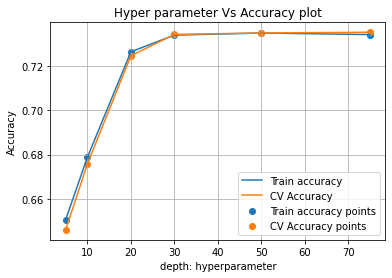

In [159]:

from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = DecisionTreeClassifier()
parameters = {'max_depth':[5,10,20,30,50,75]}
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy')
clf.fit(A_train, A_y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_max_depth'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']


plt.plot(max_depth, train_auc, label='Train accuracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')


plt.scatter(sorted(max_depth), train_auc, label='Train accuracy points')
plt.scatter(sorted(max_depth), cv_auc, label='CV Accuracy points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()

In [160]:
DT_model = DecisionTreeClassifier(max_depth = 30)
DT_model.fit(A_train,A_y_train)

y_predicted = DT_model.predict(A_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(A_y_test,y_predicted))
accuracy_score(A_y_test,y_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[39442 10438]
 [12893 30811]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.750694563173192

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


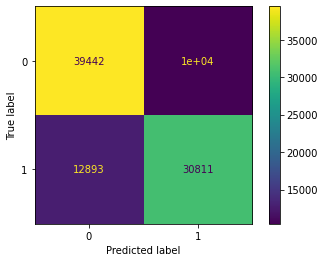

In [161]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_model,A_test,A_y_test)

Text(0.5, 0, 'Relative Importance')

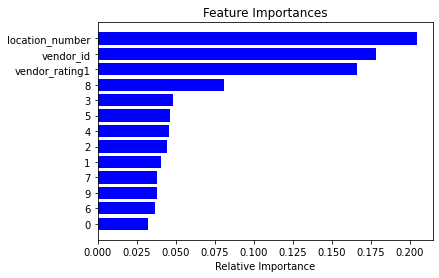

In [162]:
features=A.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

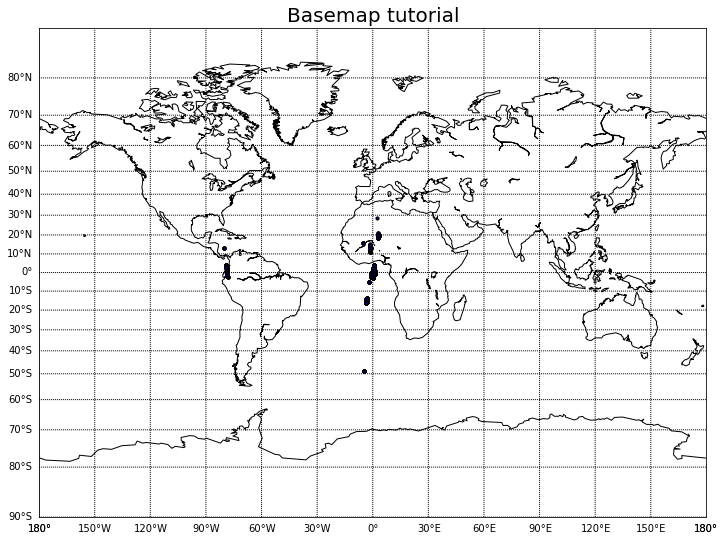

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c',)

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = X['latitude_x'].tolist()
sites_lon_x = X['longitude_x'].tolist()

#colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=10, c='darkblue', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
#m.scatter(-135,60,latlon=True, s=5000, c='blue', marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Basemap tutorial', fontsize=20)

plt.show()

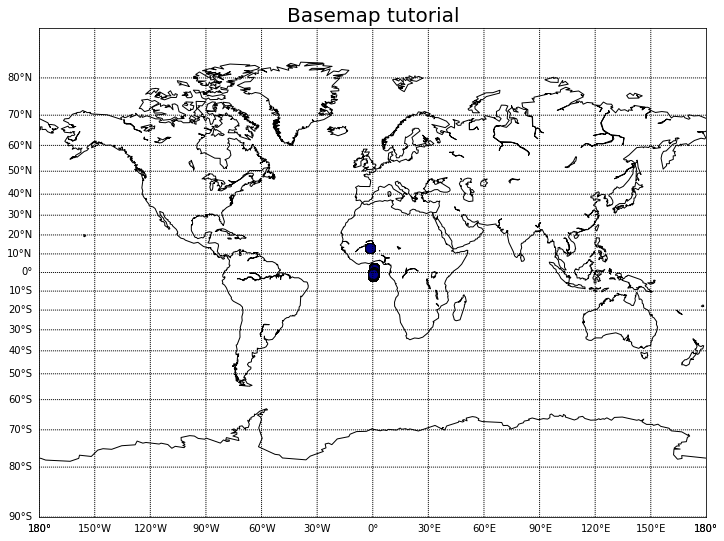

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = X['latitude_y'].tolist()
sites_lon_x = X['longitude_y'].tolist()

#colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=100, c='darkblue', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
#m.scatter(-135,60,latlon=True, s=5000, c='blue', marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)

plt.title('Basemap tutorial', fontsize=20)

plt.show()

In [ ]:
latmean=X['latitude_y'].mean()
lonmean=X['longitude_y'].mean()

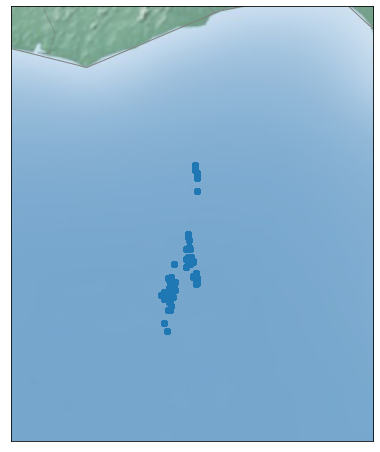

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=latmean, lon_0=lonmean,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(X['longitude_y'],X['latitude_y'], latlon=True,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label=r'$\log_{10}({\rm population})$')
#plt.clim(3, 7)

In [ ]:
latmean=X['latitude_y'].mean()
lonmean=X['longitude_y'].mean()

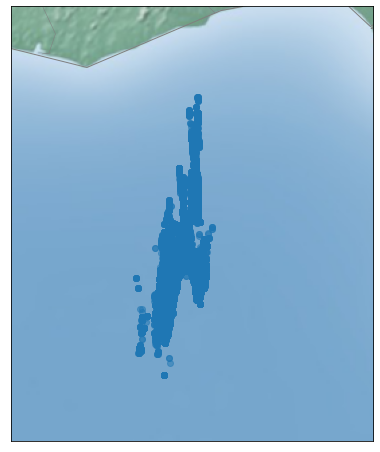

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            lat_0=latmean, lon_0=lonmean,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(X['longitude_x'],X['latitude_x'], latlon=True,
          cmap='Reds', alpha=0.5)

In [ ]:
X.head(5)

,gender,vendor_category_en,location_number,vendor_id,mean_rating,serving_distance,prepration_time,deliverydistance,is_favorite,total_time_taken,driver_rating,morning,afternoon,evening,0,1,2,3,4,5,6,7,8,9,vendor_rating1,cluster_ID
0,0,0,0,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
1,0,0,1,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
2,0,0,2,113,4.7,15.0,10,2.9,1,61.983333,5.0,1.0,1.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,4.942331,3
3,0,0,0,237,4.6,15.0,15,2.9,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,0,0,1,237,4.6,15.0,15,2.9,2,61.983333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.098368,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3


In [163]:
B = X[['gender','vendor_category_en','location_number','vendor_rating1','vendor_id','mean_rating','is_favorite',
       0,1,2,3,4,5,6,7,8,9,'cluster_ID','morning','afternoon','evening','driver_rating']]

In [164]:
from sklearn.model_selection import train_test_split
B_train, B_test, B_y_train, B_y_test = train_test_split(B, y, test_size=0.33, stratify=y)
B_train, B_cv, B_y_train, B_y_cv = train_test_split(B_train, B_y_train, test_size=0.33, stratify=B_y_train)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.255484      0.000887  ...        0.001790                6
1       0.448780      0.008238  ...        0.000514                5
2       0.664720      0.005103  ...        0.000888                4
3       0.700176      0.005936  ...        0.000481                1
4       0.706476      0.007584  ...        0.000495                2
5       0.701652      0.004307  ...        0.001002                3

[6 rows x 12 columns]


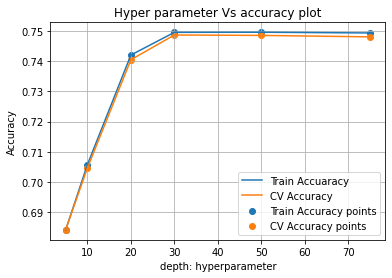

In [166]:

from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = DecisionTreeClassifier()
parameters = {'max_depth':[5,10,20,30,50,75]}
#parameters = {'min_samples_split':[2,3,5,7,10,12]}
#parameters = {"C":[0.01,0.1,1,10]}
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy')
clf.fit(B_train, B_y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_max_depth'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']
#min_samples_split = results['param_min_samples_split']

plt.plot(max_depth, train_auc, label='Train Accuaracy')
plt.plot(max_depth, cv_auc, label='CV Accuracy')


plt.scatter(sorted(max_depth), train_auc, label='Train Accuracy points')
plt.scatter(sorted(max_depth), cv_auc, label='CV Accuracy points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs accuracy plot")
plt.grid()




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.650417      0.005462  ...        0.000961                1
1       0.650374      0.006865  ...        0.001025                2
2       0.959818      0.379916  ...        0.000745                3
3       0.643674      0.004375  ...        0.000118                4

[4 rows x 12 columns]


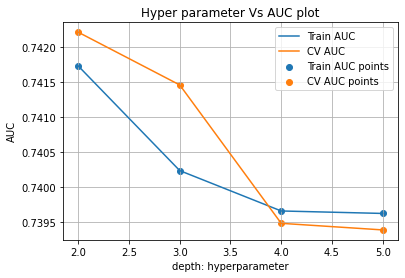

In [167]:
from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = DecisionTreeClassifier(max_depth = 20)
parameters = {'min_samples_split':[2,3,4,5]}
#parameters = {'min_samples_split':[2,3,5,7,10,12]}
#parameters = {"C":[0.01,0.1,1,10]}
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy')
clf.fit(B_train, B_y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_min_samples_split'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
min_samples_split =  results['param_min_samples_split']
#min_samples_split = results['param_min_samples_split']

plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, cv_auc, label='CV AUC')


plt.scatter(sorted(min_samples_split), train_auc, label='Train AUC points')
plt.scatter(sorted(min_samples_split), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()

In [168]:
DT_model = DecisionTreeClassifier(max_depth = 30,min_samples_split =3)
DT_model.fit(B_train,B_y_train)

y_predicted = DT_model.predict(B_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(B_y_test,y_predicted))
accuracy_score(B_y_test,y_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[39411 10469]
 [11337 32367]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7669900837750043

In [169]:
import joblib

filename = 'finalized_DT_model.pkl'
joblib.dump(DT_model, filename)

['finalized_DT_model.pkl']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


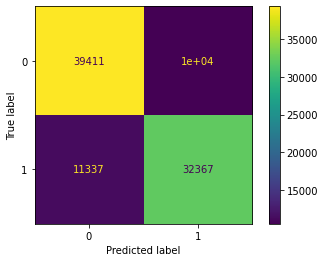

In [170]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_model,B_test,B_y_test)

Text(0.5, 0, 'Relative Importance')

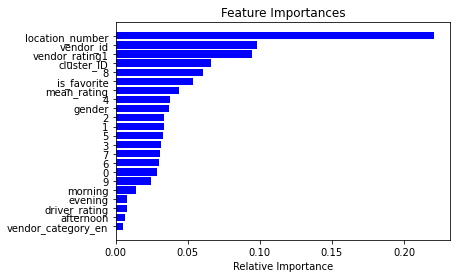

In [171]:
features=B.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       4.235771      0.024891  ...        0.003597                6
1       6.972496      0.048691  ...        0.002324                5
2      10.915215      0.090089  ...        0.002801                1
3      12.188159      0.626053  ...        0.002531                2
4      11.616458      0.058489  ...        0.002036                3
5      11.791135      0.108762  ...        0.002097                4

[6 rows x 12 columns]


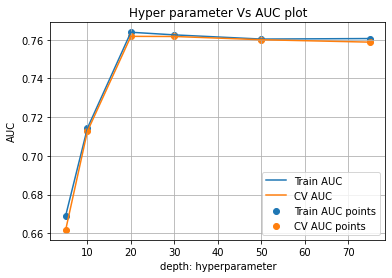

In [172]:
from sklearn.model_selection import GridSearchCV
# creating a RF classifier
#model = RandomForestClassifier(n_estimators = 100)
#model = LogisticRegression()
model = RandomForestClassifier(n_estimators = 100)
parameters = {'max_depth':[5,10,20,30,50,75]}
#parameters = {'min_samples_split':[2,3,5,7,10,12]}
#parameters = {"C":[0.01,0.1,1,10]}
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy')
clf.fit(B_train,B_y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
print(results)
results = results.sort_values(['param_max_depth'])


train_auc= (results['split0_test_score'] + results['split1_test_score'])/2
train_auc_std= results['mean_test_score']
cv_auc = results['split2_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']
#min_samples_split = results['param_min_samples_split']

plt.plot(max_depth, train_auc, label='Train AUC')
plt.plot(max_depth, cv_auc, label='CV AUC')


plt.scatter(sorted(max_depth), train_auc, label='Train AUC points')
plt.scatter(sorted(max_depth), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()



In [173]:
RF_model = RandomForestClassifier(n_estimators = 100,max_depth = 20)

RF_model.fit(B_train,B_y_train)
y_predicted = RF_model.predict(B_test)
accuracy_score(B_y_test,y_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7777184134040007

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


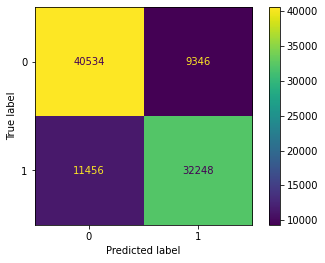

In [174]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(RF_model,B_test,B_y_test)

Text(0.5, 0, 'Relative Importance')

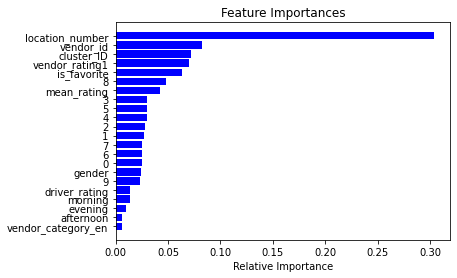

In [175]:
features=B.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
import joblib

filename = 'finalized_RF_model.pkl'
joblib.dump(RF_model, filename)

['finalized_RF_model.pkl']

In [ ]:
import numpy as np
a =[1,2,3,4,5]
a = np.array(a).reshape(1,-1)
a.shape

(1, 5)

In [ ]:
a

array([[1, 2, 3, 4, 5]])